In [56]:
from tensorflow import keras
from keras import datasets, layers, utils
import numpy as np
import matplotlib.pyplot as plt
import copy

In [57]:
(train_data, train_labels), (test_data, test_labels) = datasets.reuters.load_data(num_words=10000)

In [58]:
len(train_data)

8982

In [59]:
len(test_data)

2246

In [60]:
word_index = datasets.reuters.get_word_index()

In [61]:
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_newswire = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]]
)

In [62]:
train_labels[10]

3

In [63]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

In [64]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [65]:
def to_one_hot(labels, dimension=46):
    result = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        result[i, label] = 1.
    return result
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [66]:
# Keras have built in metods for one hot encoding
y_train = utils.to_categorical(train_labels)
y_test = utils.to_categorical(test_labels)

In [67]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [68]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [69]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [70]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4174 - loss: 3.1053 - val_accuracy: 0.6070 - val_loss: 1.7552
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6673 - loss: 1.5751 - val_accuracy: 0.6990 - val_loss: 1.3457
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7435 - loss: 1.1903 - val_accuracy: 0.7440 - val_loss: 1.1791
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7919 - loss: 0.9647 - val_accuracy: 0.7610 - val_loss: 1.0767
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8311 - loss: 0.7869 - val_accuracy: 0.7880 - val_loss: 0.9927
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8649 - loss: 0.6578 - val_accuracy: 0.7870 - val_loss: 0.9766
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8874 - loss: 0.5457 - val_accuracy: 0.8040 - val_loss: 0.9179
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9006 - loss: 0.4619 - val_accuracy: 0.8040 - val_

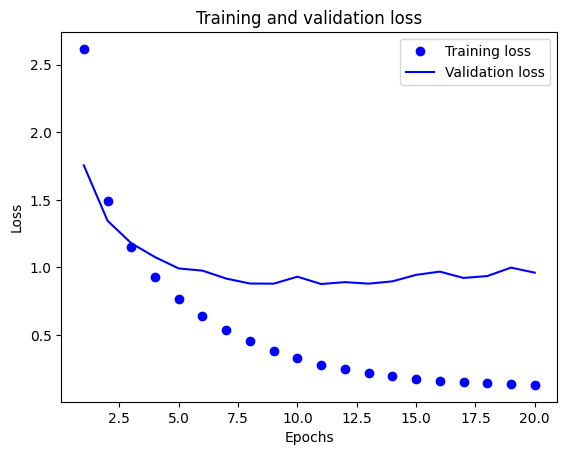

In [71]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

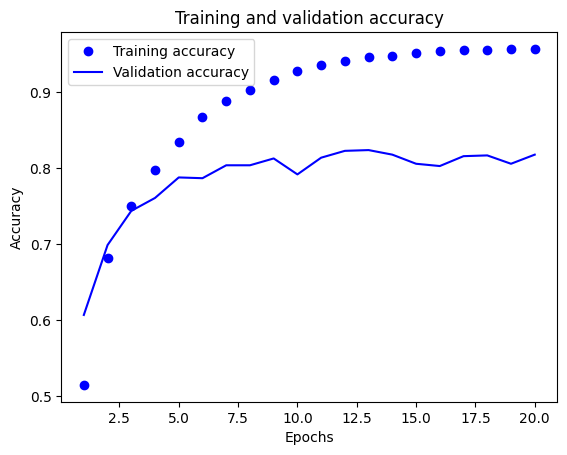

In [72]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [73]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)


Epoch 1/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3499 - loss: 3.2758
Epoch 2/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6452 - loss: 1.6288
Epoch 3/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7481 - loss: 1.1711
Epoch 4/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7977 - loss: 0.9515
Epoch 5/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8397 - loss: 0.7645
Epoch 6/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8634 - loss: 0.6521
Epoch 7/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8869 - loss: 0.5321
Epoch 8/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9131 - loss: 0.4300
Epoch 9/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9210 - loss: 0.3673
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - accuracy: 0.8091 - loss: 0.8790


In [74]:
results

[0.8939815759658813, 0.8000890612602234]

In [75]:
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.19991095280498664

In [76]:
predictions = model.predict(x_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step


In [77]:
predictions[0].shape

(46,)

In [78]:
np.sum(predictions[0])

1.0000001

In [79]:
np.argmax(predictions[0])

3

In [80]:
y_train = np.array(train_labels)
x_test = np.array(test_labels)

# Experienemnt with model with two low dimension

In [81]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [83]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3065 - loss: 3.7074 - val_accuracy: 0.3740 - val_loss: 3.2486
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4644 - loss: 3.0796 - val_accuracy: 0.5830 - val_loss: 2.7975
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5900 - loss: 2.6214 - val_accuracy: 0.5980 - val_loss: 2.5769
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6063 - loss: 2.3694 - val_accuracy: 0.3610 - val_loss: 2.3863
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3989 - loss: 2.0983 - val_accuracy: 0.3920 - val_loss: 2.0005
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5247 - loss: 1.5779 - val_accuracy: 0.7040 - val_loss: 1.4011
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7708 - loss: 1.0224 - val_accuracy: 0.7080 - val_loss: 1.3124
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7901 - loss: 0.9001 - val_accuracy: 0.7150 - val_loss: